In [2]:
#Importing packages
using Plots
using StatsBase
using StatsPlots
using Distributions
using LinearAlgebra
using LaTeXStrings
using CSV, DataFrames
using Random

**Random Walker in Ising Lattice**

The standard Ising Model Hamiltonian with zero field can be written as:
$$H = -J\sum \limits_{\langle ij \rangle} s_is_j$$

Here, a 2 dimensional $N\times N$ lattice is considered and to each lattice site, we associate a spin which can take values $\pm 1$. 

Each spin is mapped with a virtual 1D random walker. The standard update rule for Ising Model at temperature T is followed and after each Monte Carlo Step (MCS), that is, after $N^2$ updates, the position of the walker is changed according to the spins (if the spin is in +1, the walker moves right, if it is in -1, it moves left).

In [3]:
#=Function to impose periodic boundary conditions:
if index site is less than 1, it returns n (the index of the opposite site of the lattice) and vice versa. 
this way, the whole lattice is wrapped around itself, satisfying PBC
=#
function boundary(i)
    if i<1
        return n
    elseif i>n
        return 1
    else
        return i
    end
end    

boundary (generic function with 1 method)

In [4]:
function init_st(n, p)
    L=zeros(n,n); #creating a matrix which will be our lattice

    #assigning spins to lattice site according to probability p 
    for i =1:n
        for j = 1:n
            a=rand()
            if a<p
                L[i,j]=1
            else
                L[i,j]=-1
            end
        end
    end
    L
end

init_st (generic function with 1 method)

We are taking a $100\times 100$ lattice and starting from an initial state of all random spins. We implement the updates till 400 MCS and then plot the density distribution of the position $x$ of the walker for different temperatures.

In [ ]:
#dimension
n=100
#plot()
#Metropolis
#defining range of beta for which to run
para=0
#running for 100 trials
L= init_st(n, 0.5);

X=zeros(n,n)
MCS=n*n
A=0
#running each MC step
for temp in [1]
    Avg=[]
    for trial =1:1
        L= init_st(n, 0.5);
        X=zeros(n,n)
        for m =1:400*MCS
            b=1/temp
            #choosing a random lattice point
            i=rand(1:n)
            j=rand(1:n)
            S= -2*L[i,j]*(L[boundary(i+1),j]+L[boundary(i-1),j]+L[i,boundary(j+1)]+L[i,boundary(j-1)]) #calculating energy difference between the present state and if spin is flipped
            E_diff=-S
            #using the spin flip rules
            if E_diff<=0
                    L[i,j]*=-1
            else
                A=exp(-b*E_diff)
                cnt=rand()
                if cnt<A
                    L[i,j]*=-1
                end
            end
            if m%MCS==0
                X=X+L
            end
            if m in [400*MCS]
                #density!(reshape(X,(n*n,1)), label="T=$para")
                append!(Avg,reshape(X,(n*n,1)))
            end
        end
        df = DataFrame(trials=vec(reshape(X,(n*n,1))))
        CSV.write("Random_Walk distributionT1.csv", df) 
    end    
end

In [ ]:
#dimension
n=100
#plot()
#Metropolis
#defining range of beta for which to run
para=0
#running for 100 trials
L= init_st(n, 0.5);

X=zeros(n,n)
MCS=n*n
A=0
#running each MC step
#change temperature value accordingly
for temp in [1]
    Avg=[]
    for trial =1:500
        L= init_st(n, 0.5);
        X=zeros(n,n)
        for m =1:400*MCS
            b=1/temp
            #choosing a random lattice point
            i=rand(1:n)
            j=rand(1:n)
            S= -2*L[i,j]*(L[boundary(i+1),j]+L[boundary(i-1),j]+L[i,boundary(j+1)]+L[i,boundary(j-1)]) #calculating energy difference between the present state and if spin is flipped
            E_diff=-S
            #using the spin flip rules
            if E_diff<=0
                    L[i,j]*=-1
            else
                A=exp(-b*E_diff)
                cnt=rand()
                if cnt<A
                    L[i,j]*=-1
                end
            end
            if m%MCS==0
                X=X+L
            end
            if m in [400*MCS]
                #density!(reshape(X,(n*n,1)), label="T=$para")
                append!(Avg,reshape(X,(n*n,1)))
            end
        end
        col= CSV.read("Random_Walk distributionT1.csv", DataFrame)
        df = DataFrame(trials=vec(reshape(X,(n*n,1))))
        col1=hcat(col, df, makeunique=true)
        CSV.write("Random_Walk distributionT1.csv", col1) 
    end
end

        

In [13]:
plot()
for x in [2,2.5,3,4,5]
    df1 = CSV.read("Random_Walk distributionT"*"$x"*".csv", DataFrame);
    X1=[]
    for i in 1:500
        
        append!(X1,df1[!,i][1:10000])
        
    end
    density!(X1,label="T=$x", norm=true, title="Distribution of walker position", xlabel="x", ylabel=L"P(x)")
end
#density(X,label="T=1", norm=true)

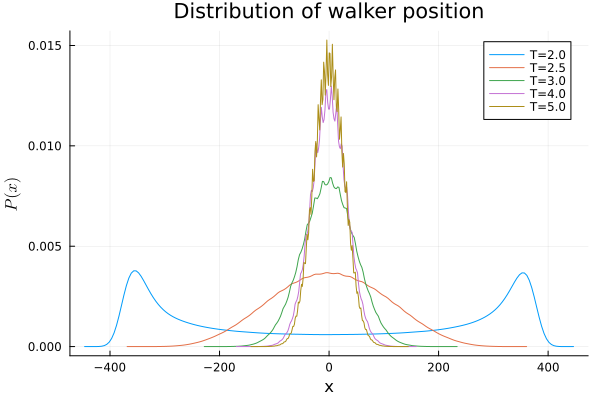

In [14]:
plot!()

We see that for low temperature, the distribution of the position of the walker follows a two-peaked curve. As temperature increases, since there is no longer any correlation with the spins, the distribution takes a gaussian form with peak around $x=0$ and decreasing width